# Carga de información

## Importando librerias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from plotly import express as px
import plotly.graph_objects as go
plt.style.use('seaborn')

## Paleta de colores (seaborn)

In [123]:
paleta = 'flare_r'

## Carga de la base de datos

In [3]:
df = pd.read_csv('../data/synergy_logistics_database.csv', index_col='register_id')
display(df)

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...
19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000


Asiganmos el tipo de dato [datetime] a la columna **date**

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
display(df)

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,2015-01-31,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,2015-02-01,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,2015-02-02,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,2015-02-03,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,2015-02-04,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...
19052,Imports,Japan,Singapore,2020,2020-06-27,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,2020-06-28,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,2020-06-29,Gas turbines,Sea,Union Energy Co,33000000


## Análisis exploratorio

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19056 entries, 1 to 19056
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   direction       19056 non-null  object        
 1   origin          19056 non-null  object        
 2   destination     19056 non-null  object        
 3   year            19056 non-null  int64         
 4   date            19056 non-null  datetime64[ns]
 5   product         19056 non-null  object        
 6   transport_mode  19056 non-null  object        
 7   company_name    19056 non-null  object        
 8   total_value     19056 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.5+ MB


In [6]:
df.describe()

,year,total_value
count,19056.000000,1.905600e+04
mean,2017.496327,1.131881e+07
std,1.706975,1.536656e+07
min,2015.000000,0.000000e+00
25%,2016.000000,6.400000e+04
50%,2017.000000,5.000000e+06
75%,2019.000000,1.600000e+07
max,2020.000000,2.850000e+08


# Rutas mas comerciales

## Destinos comerciales en general

Creamos un array para conocer los destinos mas recurridos en base a contar las veces que aparece en el data frame

In [10]:
destinos_array = []
[destinos_array.append([country, df[df['destination'] == country].destination.count()]) for country in df['destination'].unique()]
print(destinos_array)

[['China', 1503], ['USA', 1546], ['South Korea', 415], ['Spain', 632], ['Italy', 422], ['Japan', 1072], ['Germany', 1179], ['Mexico', 1836], ['Brazil', 903], ['France', 893], ['Switzerland', 194], ['United Kingdom', 531], ['Croatia', 30], ['Ireland', 162], ['Belgium', 1248], ['Argentina', 393], ['Singapore', 586], ['Canada', 857], ['Netherlands', 699], ['Belorussia', 219], ['Turkey', 80], ['India', 180], ['Vietnam', 497], ['Russia', 295], ['United Arab Emirates', 615], ['Thailand', 1032], ['Philippines', 114], ['Peru', 44], ['Austria', 66], ['New Zealand', 249], ['Rusia', 204], ['Slovakia', 94], ['Malaysia', 89], ['Poland', 177]]


In [38]:
df_destinos = pd.DataFrame(destinos_array, columns=['País', 'Rating'])
df_destinos.set_index('País', inplace=True)
display(df_destinos)

,Rating
País,
China,1503
USA,1546
South Korea,415
Spain,632
Italy,422
Japan,1072
Germany,1179
Mexico,1836
Brazil,903


Ordenando la lista de paises mas comerciales

In [39]:
df_destinos.sort_values(by = 'Rating', ascending=False, inplace=True)
df_destinos.head()

,Rating
País,
Mexico,1836
USA,1546
China,1503
Belgium,1248
Germany,1179


### Plot destinos comerciales

Seaborn plot

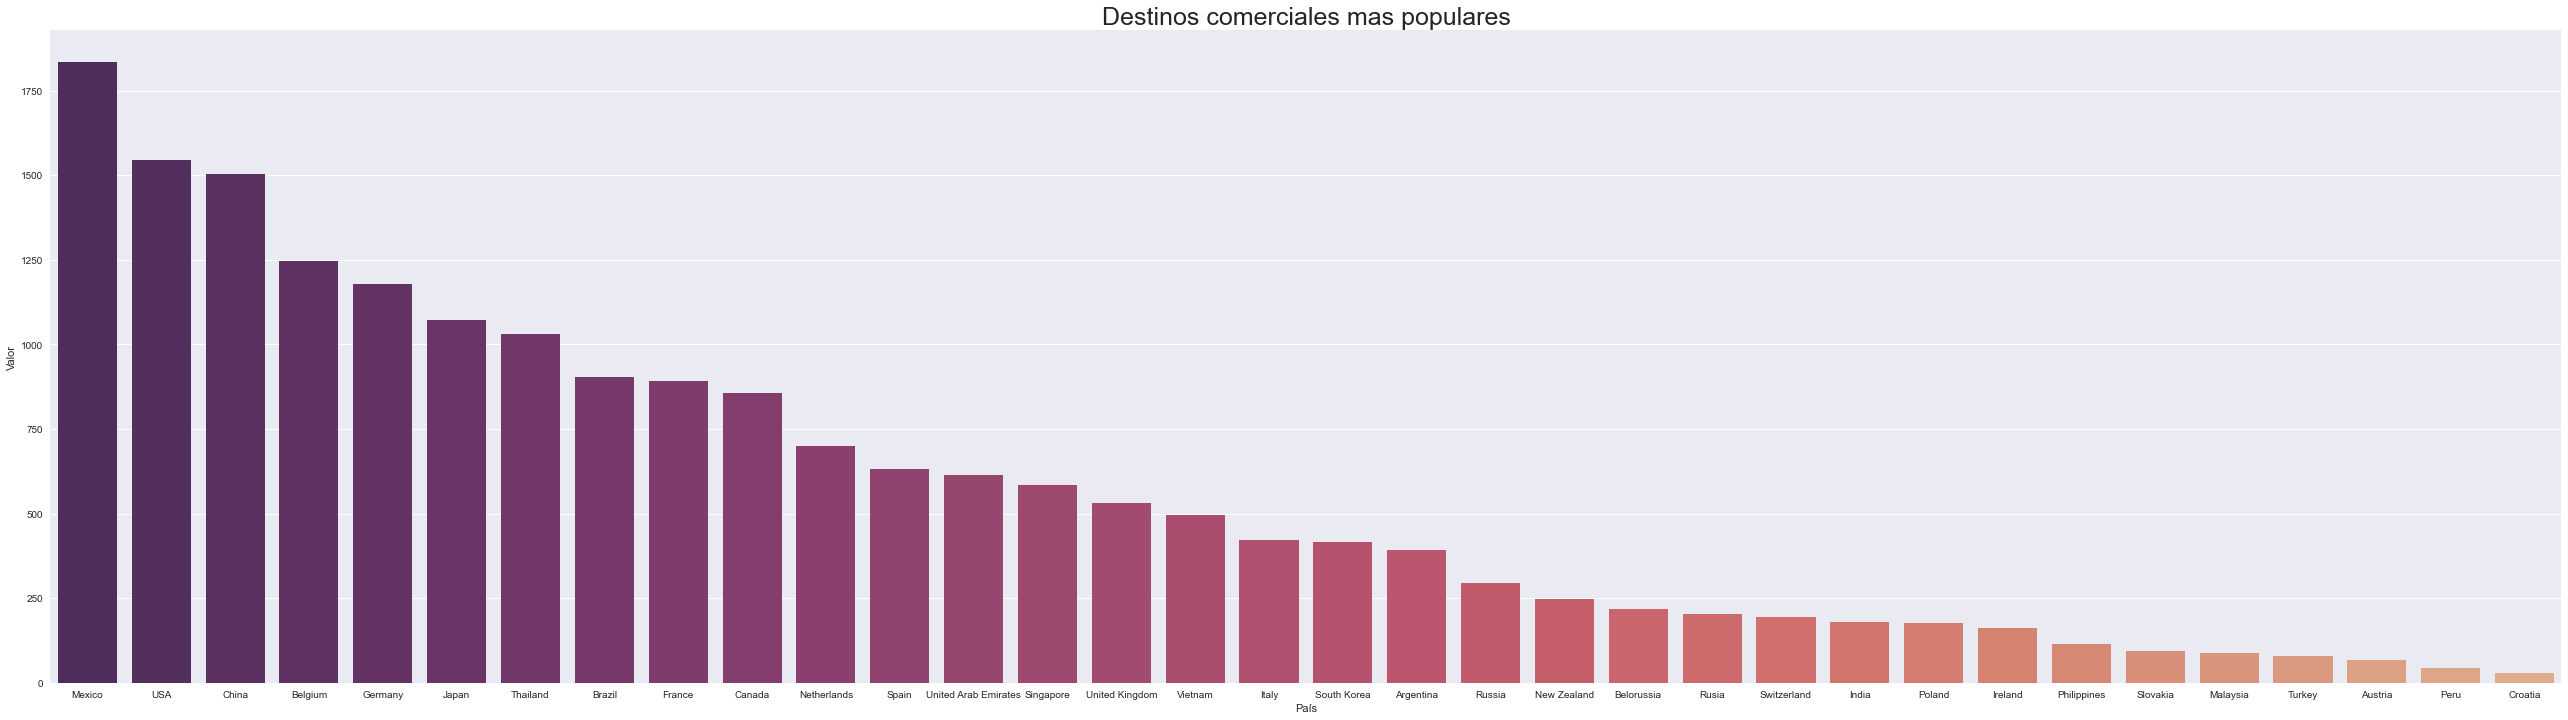

In [124]:
plt.figure(figsize=(45,12))
sns.barplot(
    x = df_destinos.index, 
    y = df_destinos['Rating'],
    palette=paleta
    )
plt.title('Destinos comerciales mas populares', fontdict={'fontsize':25})
plt.xlabel('País')
plt.ylabel('Valor')
plt.show()


Plotly plot

In [44]:
fig1 = px.bar(df_destinos, x = df_destinos.index, y = 'Rating', title='Destinos comerciales mas populares')
fig1.show()

Plotly pieplot

In [46]:
fig = px.pie(df_destinos, values='Rating', names=df_destinos.index, title='Composición (%) de los destinos comerciales mas populares')
fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

## Destinos comerciales por importación y exportación

Filtramos las importaciones y exportaciones en dos df diferentes

In [16]:
df_Exports = df[df['direction'] == 'Exports']
df_Imports = df[df['direction'] == 'Imports']

In [25]:
exports_array = []
[exports_array.append([country,df_Exports[df_Exports['destination'] == country].destination.count()]) for country in df['destination'].unique()]
print(exports_array)

[['China', 1008], ['USA', 1345], ['South Korea', 415], ['Spain', 632], ['Italy', 422], ['Japan', 658], ['Germany', 824], ['Mexico', 1404], ['Brazil', 903], ['France', 893], ['Switzerland', 194], ['United Kingdom', 531], ['Croatia', 30], ['Ireland', 162], ['Belgium', 1248], ['Argentina', 393], ['Singapore', 514], ['Canada', 603], ['Netherlands', 699], ['Belorussia', 219], ['Turkey', 80], ['India', 23], ['Vietnam', 497], ['Russia', 295], ['United Arab Emirates', 356], ['Thailand', 200], ['Philippines', 114], ['Peru', 44], ['Austria', 66], ['New Zealand', 249], ['Rusia', 204], ['Slovakia', 94], ['Malaysia', 89], ['Poland', 0]]


In [26]:
imports_array = []
[imports_array.append([country, df_Imports[df_Imports['destination'] == country].destination.count()]) for country in df['destination'].unique()]
print(imports_array)

[['China', 495], ['USA', 201], ['South Korea', 0], ['Spain', 0], ['Italy', 0], ['Japan', 414], ['Germany', 355], ['Mexico', 432], ['Brazil', 0], ['France', 0], ['Switzerland', 0], ['United Kingdom', 0], ['Croatia', 0], ['Ireland', 0], ['Belgium', 0], ['Argentina', 0], ['Singapore', 72], ['Canada', 254], ['Netherlands', 0], ['Belorussia', 0], ['Turkey', 0], ['India', 157], ['Vietnam', 0], ['Russia', 0], ['United Arab Emirates', 259], ['Thailand', 832], ['Philippines', 0], ['Peru', 0], ['Austria', 0], ['New Zealand', 0], ['Rusia', 0], ['Slovakia', 0], ['Malaysia', 0], ['Poland', 177]]


Hacer el array un df

In [47]:
df_Imports_ranking = pd.DataFrame(data = imports_array, columns=['País', 'Raiking'])
df_Imports_ranking.set_index('País', inplace=True)
df_Imports_ranking.head()

,Raiking
País,
China,495
USA,201
South Korea,0
Spain,0
Italy,0


In [48]:
df_Exports_ranking = pd.DataFrame(data = exports_array, columns=['País', 'Raiking'])
df_Exports_ranking.set_index('País', inplace=True)
df_Exports_ranking.head()

,Raiking
País,
China,1008
USA,1345
South Korea,415
Spain,632
Italy,422


Ordenamiento de valores

In [50]:
df_Exports_ranking.sort_values(by='Raiking', ascending=False, inplace = True)
df_Imports_ranking.sort_values(by='Raiking', ascending=False, inplace = True)

In [66]:
display(df_Exports_ranking)

,Raiking
País,
Mexico,1404
USA,1345
Belgium,1248
China,1008
Brazil,903
France,893
Germany,824
Netherlands,699
Japan,658


In [67]:
display(df_Imports_ranking)

,Raiking
País,
Thailand,832
China,495
Mexico,432
Japan,414
Germany,355
United Arab Emirates,259
Canada,254
USA,201
Poland,177


Filtrado de paises

In [68]:
df_Imports_ranking.iloc[:10]

,Raiking
País,
Thailand,832
China,495
Mexico,432
Japan,414
Germany,355
United Arab Emirates,259
Canada,254
USA,201
Poland,177


In [76]:
df_Exports_ranking.iloc[:10]

,Raiking
País,
Mexico,1404
USA,1345
Belgium,1248
China,1008
Brazil,903
France,893
Germany,824
Netherlands,699
Japan,658


### Plot TOP países Importaciones

Seaborn plot

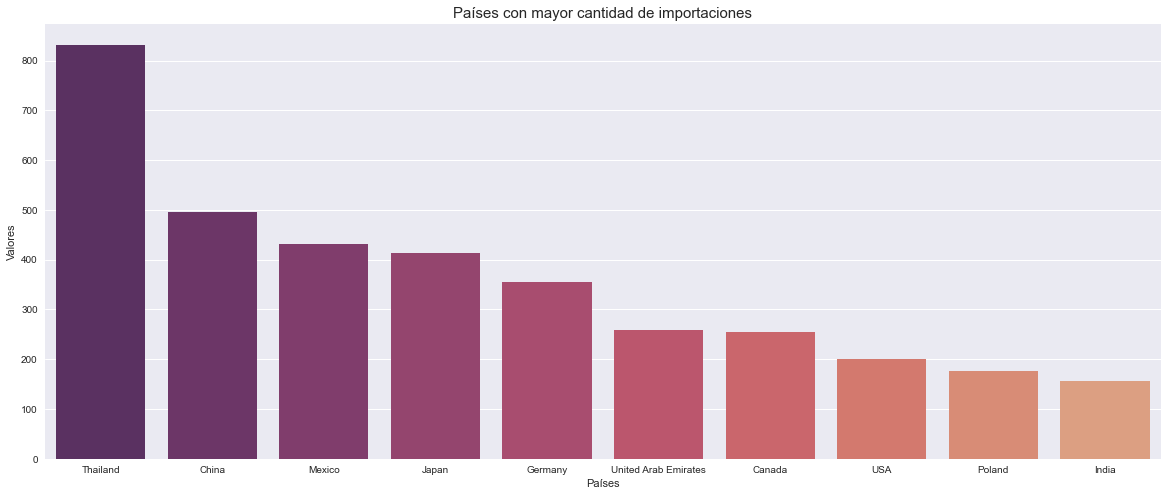

In [125]:
plt.figure(figsize=(20, 8))
sns.barplot(
    x = df_Imports_ranking.iloc[:10].index,
    y = df_Imports_ranking['Raiking'].iloc[:10],
    palette = paleta
)
plt.title('Países con mayor cantidad de importaciones', fontdict={'fontsize':15})
plt.xlabel('Países')
plt.ylabel('Valores')
plt.show()

plotly plot

In [75]:
fig1 = px.bar(
    x = df_Imports_ranking.iloc[:10].index, 
    y = df_Imports_ranking['Raiking'].iloc[:10], 
    title='Países con mayor cantidad de importaciones'
    )
fig1.show()

### Plot TOP países Exportaciones

Seaborn plot

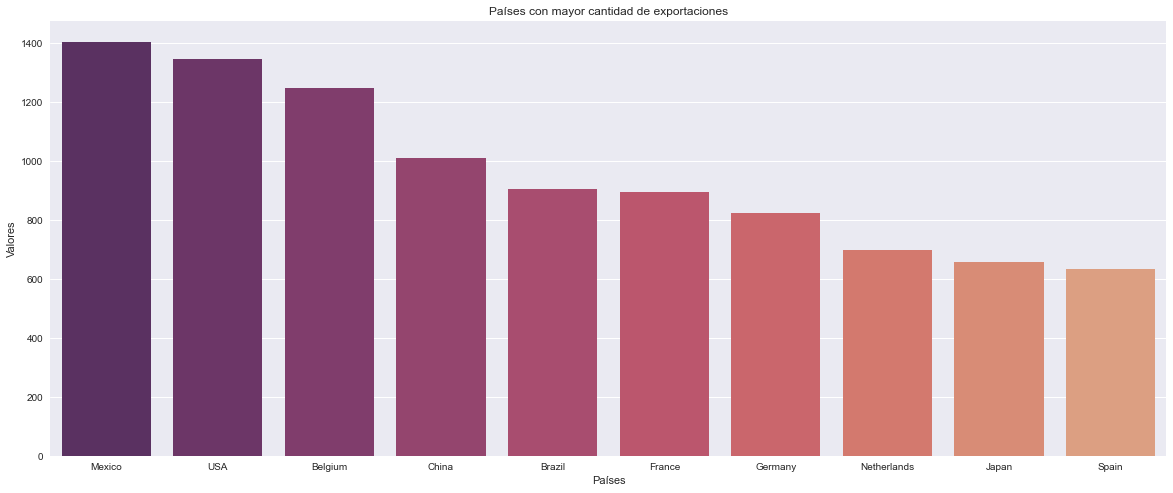

In [126]:
plt.figure(figsize=(20,8))
sns.barplot(
    x = df_Exports_ranking.iloc[:10].index, 
    y = df_Exports_ranking['Raiking'].iloc[:10], 
    palette=paleta
)
plt.title('Países con mayor cantidad de exportaciones')
plt.xlabel('Países')
plt.ylabel('Valores')
plt.show()

Plotly plot

In [78]:
fig1 = px.bar(
    x = df_Exports_ranking.iloc[:10].index, 
    y = df_Exports_ranking['Raiking'].iloc[:10],
    title='Países con mayor cantidad de exportaciones'
)
fig1.show()

# Transportes mas usados

## Preparando la información

Buscamos la forma:


[country, imports, exports]

In [149]:
array_trans_raiking = []
for country in df['transport_mode'].unique():
    imports = df[(df['transport_mode'] == country) & (df['direction'] == 'Imports')].direction.count()
    exports = df[(df['transport_mode'] == country) & (df['direction'] == 'Exports')].direction.count()
    array_trans_raiking.append([country, [imports, exports]])
print(array_trans_raiking)

[['Sea', [2254, 8434]], ['Air', [344, 2045]], ['Rail', [601, 2780]], ['Road', [449, 2149]]]


In [158]:
df_trans_mas_usados = pd.DataFrame(dict(array_trans_raiking), index=['Importaciones', 'Exportaciones']).transpose()
display(df_trans_mas_usados)

,Importaciones,Exportaciones
Sea,2254,8434
Air,344,2045
Rail,601,2780
Road,449,2149


## Plot medios mas usados (importaciones)

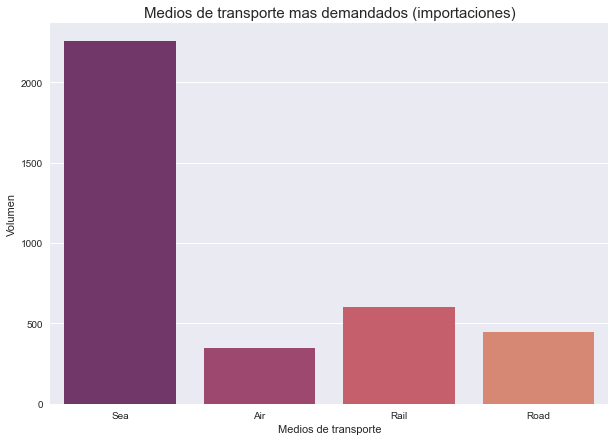

In [162]:
plt.figure(figsize=(10,7))
sns.barplot(
    x = df_trans_mas_usados.index, 
    y = df_trans_mas_usados['Importaciones'],
    palette = paleta
    )
plt.title('Medios de transporte mas demandados (importaciones)',  fontdict = {'fontsize' : 15})
plt.xlabel('Medios de transporte')
plt.ylabel('Volumen')
plt.show()

## Plot medios mas usados (exportaciones)

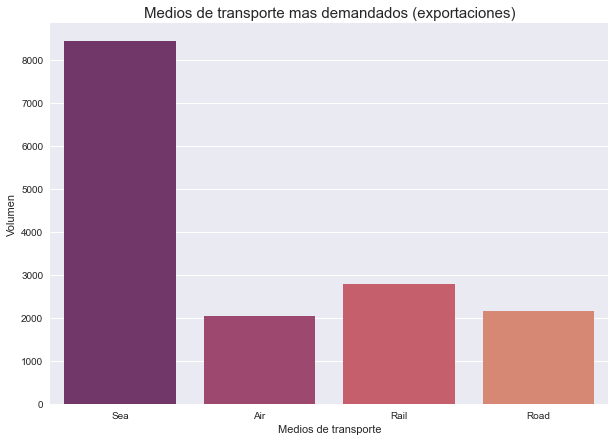

In [164]:
plt.figure(figsize=(10,7))
sns.barplot(
    x = df_trans_mas_usados.index, 
    y = df_trans_mas_usados['Exportaciones'],
    palette = paleta
    )
plt.title('Medios de transporte mas demandados (exportaciones)',  fontdict = {'fontsize' : 15})
plt.xlabel('Medios de transporte')
plt.ylabel('Volumen')
plt.show()

## Plot medios de transporte mas usados (valor total de importaciones y exportación)

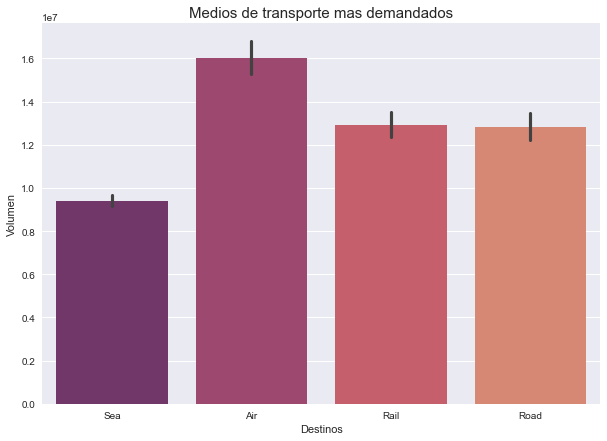

In [132]:
plt.figure(figsize=(10,7))
sns.barplot(
    x = df['transport_mode'], 
    y = df['total_value'],
    palette = paleta
    )
plt.title('Medios de transporte mas demandados',  fontdict = {'fontsize' : 15})
plt.xlabel('Destinos')
plt.ylabel('Volumen')
plt.show()

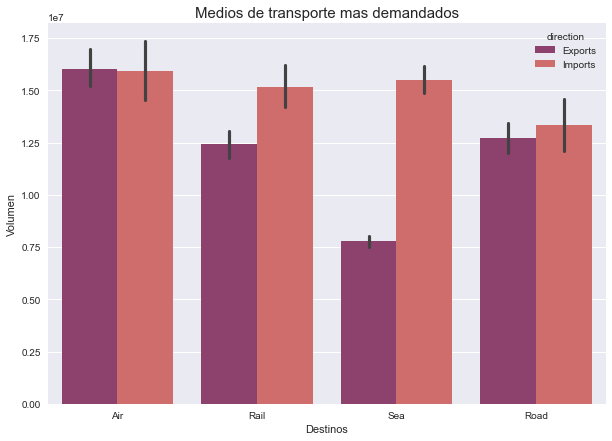

In [82]:
plt.figure(figsize=(10,7))
sns.barplot(
    x = df['transport_mode'], 
    y = df['total_value'], 
    hue = df['direction'],
    order= ['Air', 'Rail', 'Sea', 'Road'],
    palette = paleta
    )
plt.title('Medios de transporte mas demandados',  fontdict = {'fontsize' : 15})
plt.xlabel('Destinos')
plt.ylabel('Volumen')
plt.show()

<Figure size 720x504 with 0 Axes>

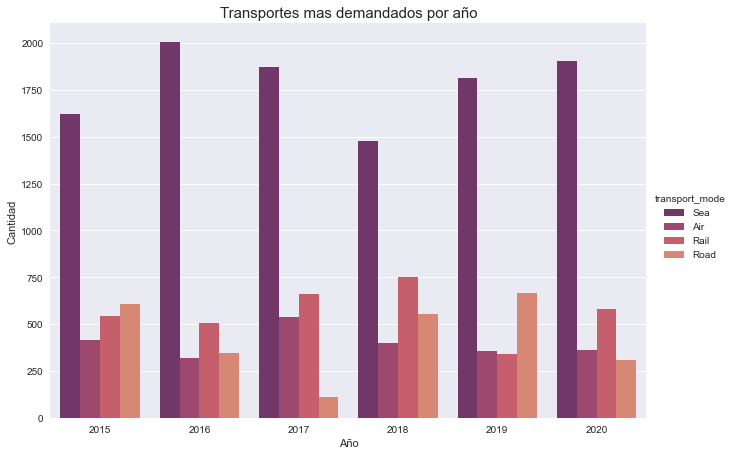

In [84]:
plt.figure(figsize=(10,7))
sns.catplot(
    data=df, 
    x = 'year', 
    hue = 'transport_mode', 
    kind = 'count',
    height=6,
    aspect=1.5,
    palette=paleta
    )
plt.title('Transportes mas demandados por año', fontdict={'fontsize':15})
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

# Países que mas importan y exportan

## Preparando la información

Realizamos un filtrado donde unicamente nos muestre un unico país en caracter de importador o exportador, posteriormente accedemos a la columna [total_value] la cual contiene el valor de las importaciones y exportaciones individuales del país seleccionado. Finalmente, usamos la función [sum()] para calcular la suma de la columna [total_value] que nos reflejará el valor total de las importaciones o exportaciones para el país elegido. 
La operación anterior se puede llevar a cabo con el comando: 


- df[(df['destination'] == 'China') & (df['direction'] == 'Imports')].total_value.sum()
- df[(df['destination'] == 'China') & (df['direction'] == 'Exports')].total_value.sum()


que tiene la forma general de realizar un filtrado con condiciones multiples de pandas [df[(*condición1*) & (*condición2*) & ... (*condición_n*)]] el cual arrojará un valor que posteriormente almacenaremos en una lista junto con el nombre del país correspondiente, resultando la forma:

- array_país_importación[['país1', *valor_total_exportaciones_país1*], ['país2', *valor_total_exportaciones_país2*], ... ['país_n', *valor_total_exportaciones_país_n*]]



In [95]:
df[(df['destination'] == 'China') & (df['direction'] == 'Exports')].total_value.sum()

11259992000

In [99]:
array_pais_importacion = []
[array_pais_importacion.append([country, df[(df['destination'] == country) & (df['direction'] == 'Imports')].total_value.sum()]) for country in df['destination'].unique()]
print(array_pais_importacion)

[['China', 2572000000], ['USA', 3758000000], ['South Korea', 0], ['Spain', 0], ['Italy', 0], ['Japan', 5828000000], ['Germany', 5109000000], ['Mexico', 8894000000], ['Brazil', 0], ['France', 0], ['Switzerland', 0], ['United Kingdom', 0], ['Croatia', 0], ['Ireland', 0], ['Belgium', 0], ['Argentina', 0], ['Singapore', 1516000000], ['Canada', 1052000000], ['Netherlands', 0], ['Belorussia', 0], ['Turkey', 0], ['India', 3018000000], ['Vietnam', 0], ['Russia', 0], ['United Arab Emirates', 7848000000], ['Thailand', 13745000000], ['Philippines', 0], ['Peru', 0], ['Austria', 0], ['New Zealand', 0], ['Rusia', 0], ['Slovakia', 0], ['Malaysia', 0], ['Poland', 2188000000]]


In [103]:
array_pais_exportacion = []
[array_pais_exportacion.append([country, df[(df['destination'] == country) & (df['direction'] == 'Exports')].total_value.sum()]) for country in df['destination'].unique()]
print(array_pais_exportacion)

[['China', 11259992000], ['USA', 13159409000], ['South Korea', 7321668000], ['Spain', 5934191000], ['Italy', 6109329000], ['Japan', 8777152000], ['Germany', 11303451000], ['Mexico', 28315015000], ['Brazil', 7508016000], ['France', 5850549000], ['Switzerland', 840346000], ['United Kingdom', 8150673000], ['Croatia', 699000000], ['Ireland', 1147123000], ['Belgium', 13099380000], ['Argentina', 4860036000], ['Singapore', 2437127000], ['Canada', 2714779000], ['Netherlands', 3764239000], ['Belorussia', 3529000000], ['Turkey', 1446000000], ['India', 498000000], ['Vietnam', 6877007000], ['Russia', 1841219000], ['United Arab Emirates', 1037119000], ['Thailand', 337000000], ['Philippines', 344000000], ['Peru', 1673000], ['Austria', 1901000], ['New Zealand', 9382000], ['Rusia', 989046000], ['Slovakia', 258000], ['Malaysia', 218000], ['Poland', 0]]


In [107]:
series1 = pd.Series(dict(array_pais_exportacion), name='Exportaciones')
series2 = pd.Series(dict(array_pais_importacion), name = 'Importaciones')
df_paises_raiting = pd.concat([series1, series2], axis=1)
display(df_paises_raiting)

,Exportaciones,Importaciones
China,11259992000,2572000000
USA,13159409000,3758000000
South Korea,7321668000,0
Spain,5934191000,0
Italy,6109329000,0
Japan,8777152000,5828000000
Germany,11303451000,5109000000
Mexico,28315015000,8894000000
Brazil,7508016000,0
France,5850549000,0


## Países con mayor valor de importaciones

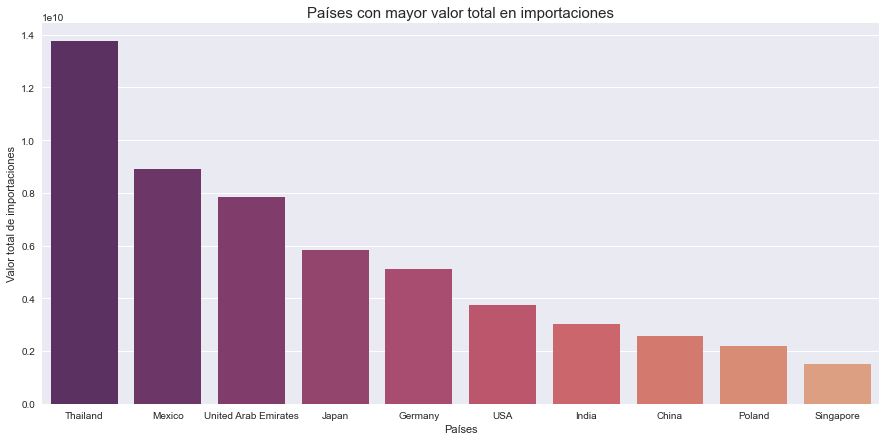

In [128]:
plt.figure(figsize=(15,7))
sns.barplot(
    x = df_paises_raiting.sort_values(by='Importaciones', ascending=False).iloc[:10].index, 
    y = df_paises_raiting.sort_values(by = 'Importaciones', ascending=False).iloc[:10].Importaciones,
    palette = paleta
)
plt.title('Países con mayor valor total en importaciones', fontdict={'fontsize':15})
plt.xlabel('Países')
plt.ylabel('Valor total de importaciones')
plt.show()

## Países con mayor valor de Exportación 

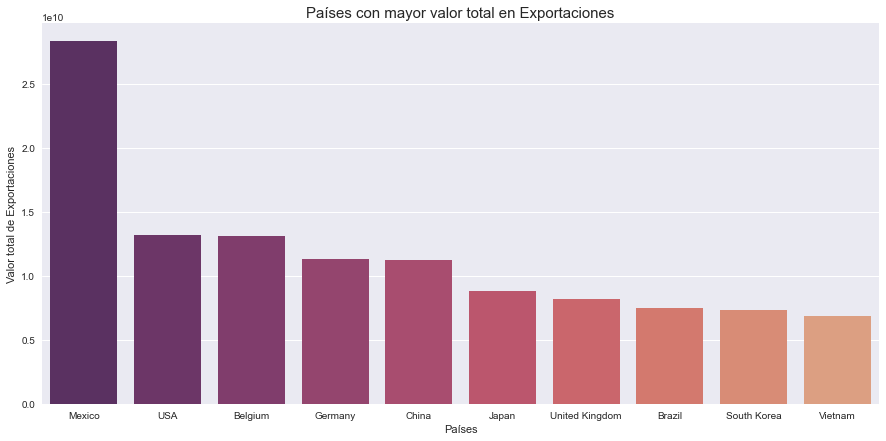

In [129]:
plt.figure(figsize=(15,7))
sns.barplot(
    x = df_paises_raiting.sort_values(by='Exportaciones', ascending=False).iloc[:10].index, 
    y = df_paises_raiting.sort_values(by = 'Exportaciones', ascending=False).iloc[:10].Exportaciones,
    palette = paleta
)
plt.title('Países con mayor valor total en Exportaciones', fontdict={'fontsize':15})
plt.xlabel('Países')
plt.ylabel('Valor total de Exportaciones')
plt.show()